In [ ]:
# importing the necessary packages 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *



from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# load the data 

nba = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-draft-2015/historical_projections.csv")
nba

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100
...,...,...,...,...,...,...,...,...,...
1085,Terrell Lyday,SG,terrell-lyday,2001,-1.486319,0.001152,0.018303,0.261035,0.719510
1086,Brandon Wolfram,SF,brandon-wolfram,2001,-1.493460,0.000271,0.011532,0.271560,0.716636
1087,Ruben Boumtje Boumtje,C,ruben-boumtje-boumtje,2001,-1.494069,0.000000,0.020653,0.236919,0.742427
1088,Greg Stevenson,SG,greg-stevenson,2001,-1.529188,0.000000,0.019693,0.238861,0.741446


In [ ]:
# check to see any null or missing values

nba.isnull().sum(axis= 0)

Player           0
Position         0
ID               0
Draft Year       0
Projected SPM    0
Superstar        0
Starter          0
Role Player      0
Bust             0
dtype: int64

# Question 1

Can we predict the player's Position from using all of the other continuous variables?

In [ ]:
# Factorize Position

Position_Key, Position_Code = pd.factorize(nba['Position'])

nba['Position_Fct'] = Position_Key

nba.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Position_Fct
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967,0
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800,1
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967,1
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850,0
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100,2


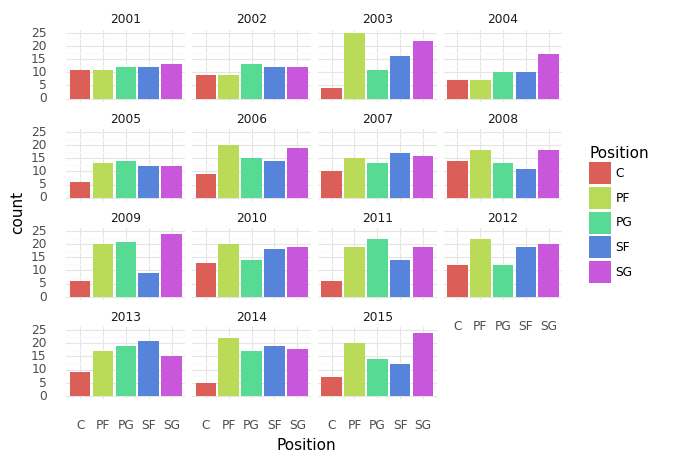

<ggplot: (-9223363284784668693)>

In [ ]:
(ggplot(nba, aes(x = "Position")) + geom_bar(aes(fill = "Position")) + facet_wrap("Draft Year") + theme_minimal())

Looking at this bar graph of all of the different positions and the number of players within each position, we can point out that no two years are alike. This shows that, even though each draft contains 60 players, the number of positions vary tremendously and the management of each team has to organize their lineup accordingly to accommodate for the new players. Some of the interesting graphs to point out are in 2001 and 2002, where the number of players in each position seem to be similar. Another point is that in recent years, from 2011 onwards, the Center position has seem some rapid decreses and the Power Forward position seems to be more popular. This could mean that more players that would normally be classified as a Center, are registering as Power Forwards because they might be more versatile. Or this could mean that the Center position is slowly being phased out from the game, and the game is becoming more Guard heavy. 

In [ ]:
# Logistic Regression Model: Can we predict the position of the player through using all of the other variables?
np.random.seed(1)

X = nba[['Draft Year', 'Projected SPM', 'Superstar', 'Starter', 'Role Player', 'Bust']]
y = nba['Position']

# creating the K Fold object 

KF = KFold(n_splits = 10)

# creating the Logistic Regression

lr = LogisticRegression()

# creating the empty list to store the accuracy of the K Fold 

accuracy = []

In [ ]:
# training the K Fold model through a for loop 

for train, test in KF.split(X):
  # this is where the train/test split is done in the fold 
  X_train = X.iloc[train]
  X_test = X.iloc[test]
  y_train = y[train]
  y_test = y[test]

  # scaling the model

  z_score = StandardScaler()
  z_score.fit(X_train)

  Xz_train = z_score.transform(X_train)
  Xz_test = z_score.transform(X_test)

  # the Logistic Regression model
  logitmodel = lr.fit(Xz_train, y_train)

  # recording the accuracy of the model
  accuracy.append(accuracy_score(y_test, logitmodel.predict(Xz_test)))

# print the accuracy and the mean of the accuracy

print(accuracy)
print(np.mean(accuracy))


[0.3669724770642202, 0.27522935779816515, 0.21100917431192662, 0.3486238532110092, 0.3302752293577982, 0.3394495412844037, 0.3211009174311927, 0.3761467889908257, 0.30275229357798167, 0.22935779816513763]
0.31009174311926613


The original question we were going to answer was if we could predict what type of "Position" would be more likely to be drafted in a given "Draft Year", but we tweaked the question. The new question that we are trying to answer is to see if we can predict what a player's "Position" from all of the other continuous variables. This would be more insightful because we want to know if there are key differences between skill level and "Projected SPM" between the 5 types of positions. This is something we were wondering as NBA fans because a lot of analysts and NBA critics are saying that the league is centering around more Guard positions rather than Center positions. We wanted to run this Logistic Regression to see if this claim was true.
Looking at the mean accuracy, it is showing that the model is predicting the correct "Position" about 31% of the time. This not a great accuracy percentage, and it shows us that the other variables are not great indicators of what a player's "Position" is.
There are other factors that are not included in this model that would greatly help predict the "Position" such as a variable that measures the height and weight of the player. The "Postion" of an NBA player is usually dictated by how tall and how much the player weighs. 
This also tell us that the "Position" does not really give us insight on how well they are projected to perform. This is saying that any "Position" can be great or terrible, and there is no dominating "Position" in the league. All in all, this is saying that there is no real correlation between a player's "Position" to how well they are projected to perform in the league.

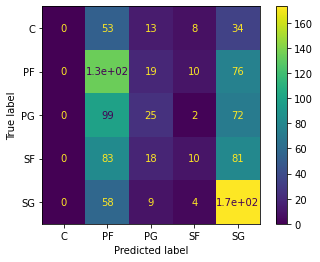

In [ ]:
plot_confusion_matrix(logitmodel, Xz_train, y_train)

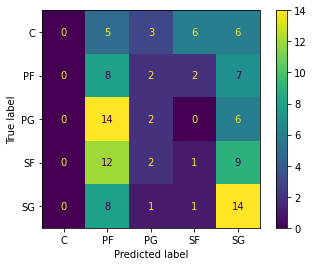

In [ ]:
plot_confusion_matrix(logitmodel, Xz_test, y_test)

These confusion matrices shows us the model's predictions against the actual values. The biggest takeaways from these matrices is that it did not predict any of the "C" values because this "Position" is very similar to that of the "PF". 
Another thing to point out is that the model did not predict much of the "PG" and "SF". This shows that there are much bigger differences in between the "SG" and "PF" positions and that is why the model predicted more of those "Positions". 
The main thing to see from these confusion matrices is that the variables are not that correlated and they don't really help predict "Position" of the player. This can also be seen by the accuracy score being closer to 0 rather than 1 with a score of 31%. Also the "C" position is either being classified to closely with the "PF" postion or many players that are supposed to be "C" are actually classifying themselves as some other position. 


# Question 2



Throughout the years, has talent risen with higher projected SPM in more recent draft years and has the number of busts decreased every year?

In [ ]:
# Veteran or Not

Vet = []

for x in nba['Draft Year']:
  if x >= 2010:
    Vet.append('Not Veteran')
  else:
    Vet.append('Veteran')

nba['Vet_Status'] = Vet



In [ ]:
# Factorize Vet_Status

Vet_Key, Vet_Code = pd.factorize(nba['Vet_Status'])

nba['Vet_Fct'] = Vet_Key

nba.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Position_Fct,Vet_Status,Vet_Fct
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967,0,Not Veteran,0
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800,1,Not Veteran,0
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967,1,Not Veteran,0
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850,0,Not Veteran,0
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100,2,Not Veteran,0


In [ ]:
# Guassian Mixture 

feats = ["Projected SPM",'Bust']

X2 = pd.DataFrame()

X2 = nba[feats]

z = StandardScaler()

X2[feats] = z.fit_transform(X2[feats])

X2['Vet_Fct'] = nba['Vet_Fct']

X2.head(n = 1000)

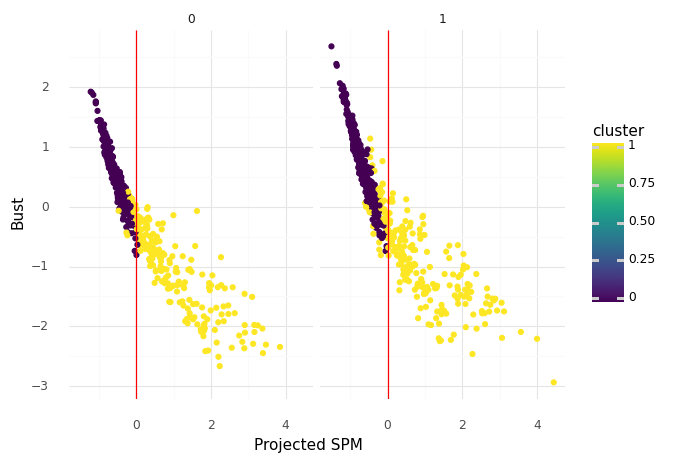

<ggplot: (-9223363279288511081)>

In [ ]:
# plotting the clusters 

EM = GaussianMixture(n_components = 2)

EM.fit(X2)

cluster = EM.predict(X2)

(ggplot(X2, aes("Projected SPM", "Bust", color = "cluster")) + facet_wrap('~Vet_Fct') + geom_point() + geom_vline(xintercept = 0, color = 'red') + theme_minimal())

The left side shows non-veteran players and the right side shows veteran players. We can see that both the plots demosntrate very similar clusters, indicating there has not been a big change in standards of players or the divide between role palyers and busts. The cutoff for both veterans and non-veterans are very similar. However, there are some points in the non-veteran clusters where players are passed the cutoff but still being classified as busts, this shows that perhaps overtime, players are infact improving but because they are still classified as busts, the league has therefore increased their standards may have also increased.

In [ ]:
silhouette_score(X2, cluster)

0.44750032817549645

In [ ]:
# Gaussian Mixture 2

feats = ["Draft Year", "Projected SPM"]

X3 = pd.DataFrame()

X3 = nba[feats]

z = StandardScaler()

X3[feats] = z.fit_transform(X3[feats])

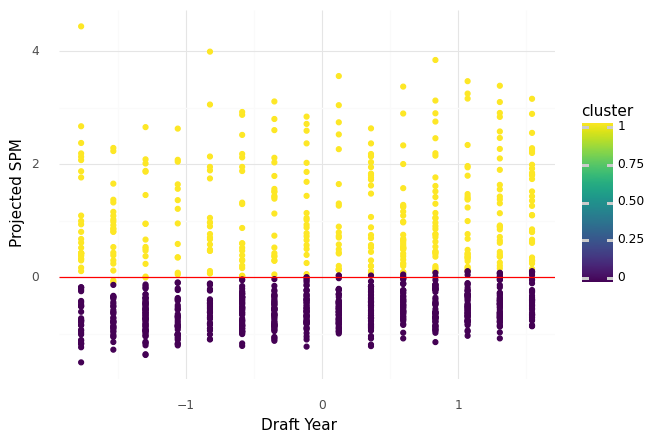

<ggplot: (-9223363279292343650)>

In [ ]:
# plotting the clusters 

EM = GaussianMixture(n_components = 2)

EM.fit(X3)

cluster = EM.predict(X3)

(ggplot(X3, aes( "Draft Year", "Projected SPM",color = "cluster"))+ geom_point() + geom_hline(yintercept = 0, color = 'red') + theme_minimal())

In [ ]:
silhouette_score(X3, cluster)

0.3594804999209688

Our original question for this model was whether there were more veterans that were superstars vs veterans that were not by using the draft years and projected SPM. However, the question we think this model better answers is whether talent in non-veterans has risen by looking at the amount of non-busts in recent years. Since we are planning on using a clustering algorithm, we decided to go 
Going into this clustering algorithm, we assumed that as the draft years progressed, the "Projected SPM" will get higher for a majority of the draft prospects. We ultimately believed that there would be a change in how the split would be, and that there would be more points above the red line.
This was not generally the case as the split remains relatively the same throughtout the years. There are a few increases in the points higher than "2" but for the most part, the years are pretty much the same. 
The clustering model itself is not bad at separating cohesive clusters. The silhouette score indicates that the clusters are relatively separated and relatively cohesive. A silhouette score should be closer to 1 rather than -1 for the clusters to be considered valid and accurate.
All in all, this algorithm tells us that the talent over the years has risen a bit but not by a significant margin. This can also point to the standards of the players being set higher, so certain players are being projected lower then they would have been in earlier draft years. 

# Question 3

Do we need all variables or all componenets of our data set to predict whether or not a player would be a bust or a role player? (Using PCA for Dimensionality Reduction)

In [ ]:
# Making a column that indicates whether a player is a Bust or a RolePlayer

Bust_RP = []

for x in nba['Projected SPM']:
  if x >= -1.4 and x <= 0.5:
    Bust_RP.append("Role Player")
  elif x <= -1.4:
    Bust_RP.append("Bust")
  else:
    Bust_RP.append("Other")

nba['BustorRolePlayer'] = Bust_RP

nba.head(n = 300)

In [ ]:
# Filter out the players that are not a Bust or Roleplayer

BustorRP_check = nba.BustorRolePlayer != "Other"

BustorRPDF = nba.loc[BustorRP_check]

BustorRPDF.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Position_Fct,Vet_Status,Vet_Fct,BustorRolePlayer
5,Dakari Johnson,C,dakari-johnson,2015,0.491787,0.021341,0.367544,0.417572,0.193544,0,Not Veteran,0,Role Player
6,Devin Booker,SG,3-devin-booker,2015,0.472577,0.073367,0.324467,0.390167,0.212000,3,Not Veteran,0,Role Player
7,Willie Cauley-Stein,C,willie-cauley-stein,2015,0.351171,0.047114,0.405990,0.243186,0.303710,0,Not Veteran,0,Role Player
8,Rondae Hollis-Jefferson,SF,rondae-hollis-jefferson,2015,0.311909,0.014590,0.368533,0.392481,0.224396,1,Not Veteran,0,Role Player
9,Trey Lyles,PF,trey-lyles,2015,0.267509,0.022386,0.351329,0.403052,0.223233,4,Not Veteran,0,Role Player


In [ ]:
# Are there more Busts than Role Players in a given Draft Year?

# PCA

feats = ['Draft Year', 'Projected SPM', 'Superstar', 'Starter', 'Role Player', 'Bust']

zscore = StandardScaler()

X4 = BustorRPDF[feats]

X4[['Projected SPM', 'Superstar', 'Starter', 'Role Player', 'Bust', "Draft Year"]] = zscore.fit_transform(X4[['Projected SPM', 'Superstar', 'Starter', 'Role Player', 'Bust', "Draft Year"]])

In [ ]:
pca = PCA()

pca.fit(X4[feats])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pcaDF = pd.DataFrame({'Exp_Var': pca.explained_variance_ratio_,
                      'PC': range(1,7),
                      'Cum_Var': pca.explained_variance_ratio_.cumsum()})

pcaDF.head(n = 50)

,Exp_Var,PC,Cum_Var
0,5.724937e-01,1,0.572494
1,2.345153e-01,2,0.807009
2,1.500848e-01,3,0.957094
3,4.201871e-02,4,0.999113
4,8.873799e-04,5,1.000000
5,1.832914e-18,6,1.000000


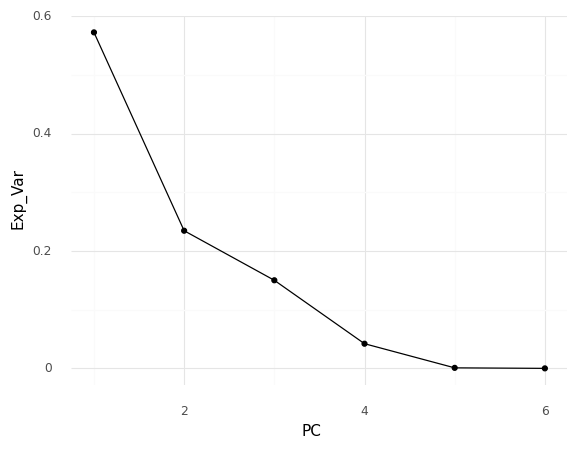

<ggplot: (8763021083824)>

In [ ]:
(ggplot(pcaDF, aes(x = 'PC', y = 'Exp_Var'))+ geom_point() + geom_line() + theme_minimal())

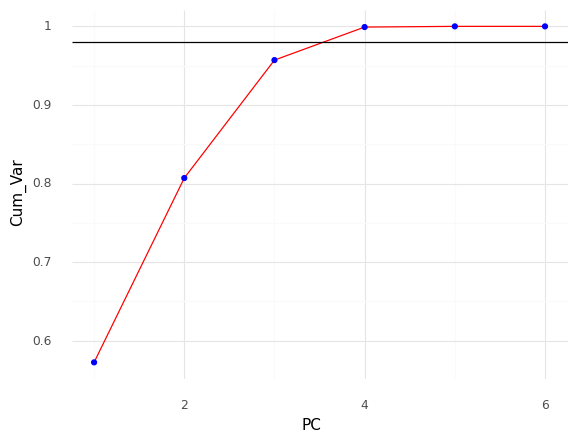

<ggplot: (-9223363273833712405)>

In [ ]:
(ggplot(pcaDF, aes( x = "PC", y = "Cum_Var")) + geom_line(color = "red") + 
 geom_point(color = "blue") + geom_hline(yintercept = 0.98) + theme_minimal())

In [ ]:
pcomps3 = pca.transform(BustorRPDF[feats])
pcomps3 = pd.DataFrame(pcomps3[:, 1:3])

pcomps4 = pca.transform(BustorRPDF[feats])
pcomps4 = pd.DataFrame(pcomps4[:, 1:4])


# first model which includes all of the features 
lrmod1 = LogisticRegression()
lrmod1.fit(BustorRPDF[feats], BustorRPDF["BustorRolePlayer"])
print("all features: ", lrmod1.score(BustorRPDF[feats], BustorRPDF["BustorRolePlayer"]))

# second model which only includes 4 out of the 6 features
lrmod2 = LogisticRegression()
lrmod2.fit(pcomps4, BustorRPDF["BustorRolePlayer"])
print("4 features: ", lrmod2.score(pcomps4, BustorRPDF["BustorRolePlayer"]))

# third model which only includes 3 out of the 6 features
lrmod3 = LogisticRegression()
lrmod3.fit(pcomps3, BustorRPDF["BustorRolePlayer"])
print("3 features: ", lrmod3.score(pcomps3, BustorRPDF["BustorRolePlayer"]))

all features:  0.9586935638808838
4 features:  0.9548511047070125
3 features:  0.9548511047070125


Our original question when trying to perform a PCA was 'Are there more Busts than Role Players or vice versa?'. However, we found that with principle component analysis, a better question that it could answer would be whether or not we actually need all the variables or components of our data set to predict whether or not a player would be a bust or a role player. Busts and roleplayers make up the majority of the draft but team management would rather be able to pick up role players over bust. This model would help decide what factors would be best to predict whether certain individuals would be classified as role players or not. Looking back at the coefficients for another model, we found that certain variables had a more impactful role in the model. Therefore, we wanted to see which vairables or components would be predict. We see in our PCA that half, if not less, of our components would actually provide very accurate predictions in our logistic regression model. We used a scree plot and ROC curve to try to pinpoint the optimal amount or the most impactful amount of components to run our regression model. Using the elbow method, we decided to use 3 components as the optimal amount. However, to compare accuracy and effectiveness of our components, we found the difference in accuracy between using all the components compared to using only 3 was a very miniscule difference to which we could sacrifice to receive a better model for our question. All in all, this PCA model showed us that the questions we ask can be answered with less variables or components without sacrificing accuracy. 

# Question 4

Are the standards of Role Players increasing over the years?

In [ ]:
# What is a Role Player's likelihood of being a Bust or a Starter?

# Filtering the dataset to only show the players classified as "Role Player"

roleplayer_feats = []

for x in nba['Projected SPM']:
  if x >= -1.4 and x <= 0.5:
    roleplayer_feats.append("Yes")
  else:
    roleplayer_feats.append("No")

nba['RolePlayer'] = roleplayer_feats

nba.head(n = 300)

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Position_Fct,RolePlayer
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967,0,No
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800,1,No
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967,1,No
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850,0,No
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100,2,No
...,...,...,...,...,...,...,...,...,...,...,...
295,Wesley Witherspoon,SF,wesley-witherspoon,2012,-1.135708,0.000067,0.046642,0.377084,0.576207,1,Yes
296,Darius Johnson-Odom,SF,darius-johnson-odom,2012,-1.163018,0.000000,0.045375,0.397457,0.557168,1,Yes
297,JaMychal Green,PF,jamychal-green,2012,-1.167714,0.000588,0.031469,0.382528,0.585415,4,Yes
298,Festus Ezeli,C,festus-ezeli,2012,-1.169516,0.000000,0.057073,0.364573,0.578354,0,Yes


In [ ]:
# This is the dataframe that will only include players that are considered Role Players by their Projected SPM

roleplayer_check = nba.RolePlayer == 'Yes'

roleplayerDF = nba.loc[roleplayer_check]

roleplayerDF.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Position_Fct,RolePlayer
5,Dakari Johnson,C,dakari-johnson,2015,0.491787,0.021341,0.367544,0.417572,0.193544,0,Yes
6,Devin Booker,SG,3-devin-booker,2015,0.472577,0.073367,0.324467,0.390167,0.212000,3,Yes
7,Willie Cauley-Stein,C,willie-cauley-stein,2015,0.351171,0.047114,0.405990,0.243186,0.303710,0,Yes
8,Rondae Hollis-Jefferson,SF,rondae-hollis-jefferson,2015,0.311909,0.014590,0.368533,0.392481,0.224396,1,Yes
9,Trey Lyles,PF,trey-lyles,2015,0.267509,0.022386,0.351329,0.403052,0.223233,4,Yes


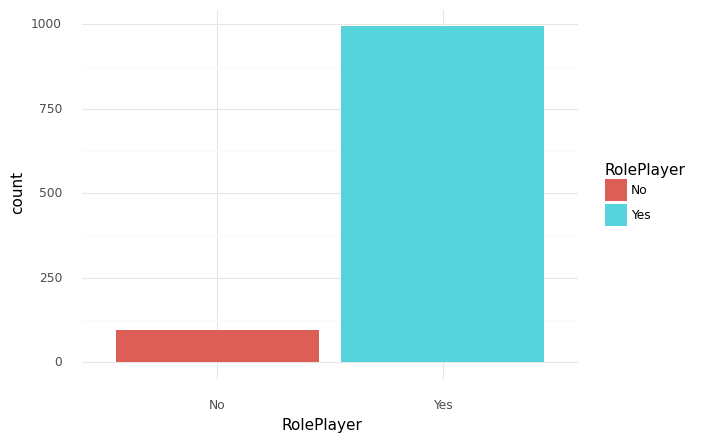

<ggplot: (-9223363284784667795)>

In [ ]:
(ggplot(nba, aes(x = "RolePlayer")) + geom_bar(aes(fill = "RolePlayer")) + theme_minimal())

This simple bar graph is informing us that the majority of the league is comprised of Role Players and we want to find out if the standards of being a part of this majority has risen. This is important because many teams depend on having skilled Role Players and also because they make up the most out of any other classification in the league. 

In [ ]:
# Linear Regression 

np.random.seed(2)

X = roleplayerDF[['Draft Year', 'Superstar', 'Starter', 'Role Player', 'Bust']]
y = roleplayerDF[['Projected SPM']]


# creating the Train Test Split

X_train, X_test, y_train, y_test = train_test_split(roleplayerDF[['Draft Year', 'Superstar', 'Starter', 'Role Player', 'Bust']], roleplayerDF[["Projected SPM"]], test_size = 0.20)

# Z scoring the variables
zscore = StandardScaler()
zscore.fit(X_train)

# transforming the continuous variables within the TTS to avoid data leakage
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)



In [ ]:
# Linear Regression Modelin

lr = LinearRegression()

linmod = lr.fit(Xz_train, y_train)

preds = linmod.predict(Xz_test)

print('Mean Squared Eror:', mean_squared_error(y_test, preds))
print('R2: ', r2_score(y_test, preds))

Mean Squared Eror: 0.001823368680189976
R2:  0.9922583342455543


Looking at the Mean Square Error and the R2, these are very great numbers for both. The MSE is measuring how much error is presnt in the model and it is showing less than 1% of error which indicates that this model is very accurate. The R2 is measuring how much variation is explained throughout the model, and the closer to 1.0 the better the model is at explaining. This model has an R2 of 0.99 which means that it is almost able to explain all of the variation. This is all indicating that the model is accurate and well run. 

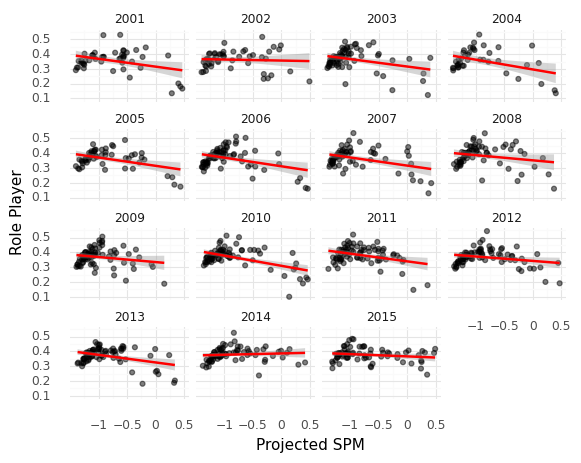

<ggplot: (8757565661160)>

In [ ]:
(ggplot(roleplayerDF, aes(x = 'Projected SPM', y='Role Player')) + geom_point(alpha = 0.5) + facet_wrap('Draft Year') + 
 stat_smooth(method = 'lm', color = 'red') + theme_minimal())

Our original question was 'What's the likelihood of roleplayers being starters or bust?' But we found that seeing the trends of standards of role players over the years were more visable. After running this linear regression model and analyzing the ggplot with Projected SPMs and Role Player % with facet wrapped by draft years, we see that in recent years, there are more points on the right side of the plot and yet the probability of being a role player remains constant. This led us to changing our question to ask instead, have role players and the standards the league classifies them increased? And we can see that starting from about 2010, more points are being distributed across the plot, but the probability of being a role player remains. This shows that the leagues standards have indeed increased because more and more role players' Projected SPM (a statistical measure of skill) have increased but still remain stagnant in type of player. Furthermore, we can also see that each more recent draft class possesses a more diverse group of individuals of varying skill levels. For example, in 2003, a majority of players are more on the brink of being classified as 'bust' and nowhere near meeting the threshold of being a 'starter'. Overall, there are just more and more players being drafted that have a higher chance of meeting the threshold of being a 'starter' rather than being a 'bust'. 

# Question 5

Has the probability of being classified as a "Starter" risen over the years?

In [ ]:
# HAC

feat = ['Draft Year', 'Projected SPM', 'Superstar', 'Starter', 'Role Player', 'Bust']

X = nba[feat]


hac = AgglomerativeClustering(n_clusters = 2, 
                              affinity = 'euclidean',
                              linkage = 'ward')



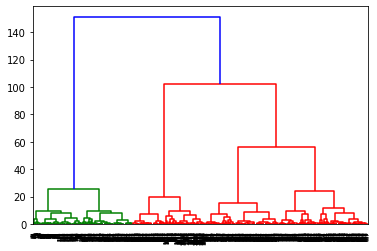

In [ ]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method = 'ward', metric = 'euclidean'))


In [ ]:
membership = hac.labels_

membership

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
silhouette_score(X, membership)

0.482282974402265

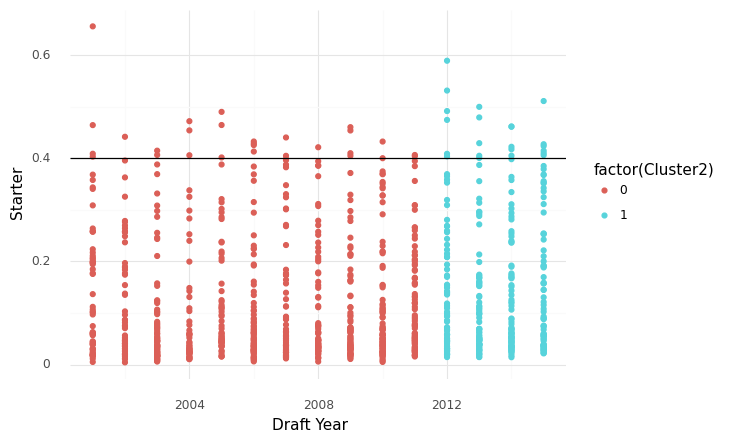

<ggplot: (8752065366613)>

In [ ]:
nba['Cluster2'] = membership

(ggplot(nba, aes(x = 'Draft Year', y = 'Starter', color = 'factor(Cluster2)')) + geom_point() + geom_hline(yintercept = 0.4, color = "black") + theme_minimal())

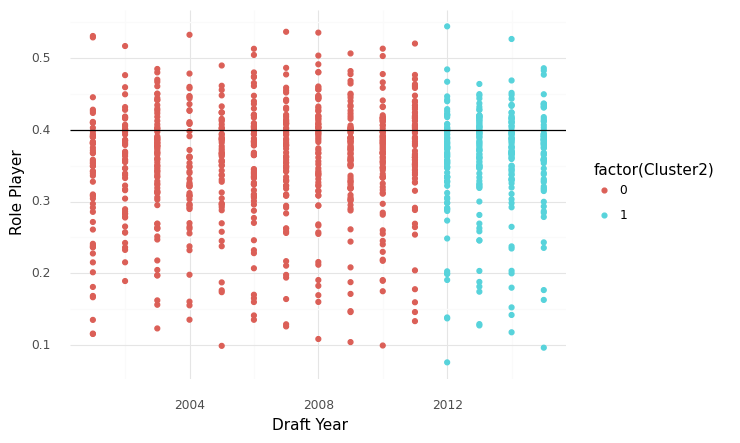

<ggplot: (8752065465969)>

In [ ]:

(ggplot(nba, aes(x = 'Draft Year', y = 'Role Player', color = 'factor(Cluster2)')) + geom_point() + geom_hline(yintercept = 0.4, color = "black") + theme_minimal())

Our original question for the HAC clustering algorithm was to see if over the years, in the Guard position, were there more "Superstar" and "Starter" classifications or did it stay the same throughout? We decided to measure only the "Starter" probabilities over the years and see if the number of higher probabilities of becoming a "Starter" had risen over the years. 
We decided on using 2 clusters through looking at our dendrogram results, as it splits off into two distinct colors. To also see how cohesive and separated these clusters are, we decided to calculate the silhouette score and it came out to be over 48%. This means that the clusters are somewhat cohesive and somewhat separated from each other. We wanted to compare the probability of being a "Starter" to the "Draft Year" and see if the number of higher probabilities had risen in recent years. As we can see from the first clustering model, the red points indicate the later years and the blue points are players from recent draft years. The black line represents the probability at 40%, and looking at the blue points there are quite a bit more players that have higher than 40% probability of becoming a "Starter". This has led us to believe and confirm the claim that the NBA has received more talented players from recent draft years. There are still players from earlier years that have higher 40% chance of being a "Starter", but for the most part the recent years are showing that there are more players that are likely to being a "Starter".
This all goes the same for the second clustering model, where we saw the probability of being classified as a "Role Player" over the years and seeing if it has changed. The recent years, indicated by the blue points, show that there have been lower probabilities for the "Role Player" and this could mean that players are either being classified as higher with either being a "Starter" or "Superstar", or there are more "Bust" classifications. 
Overall, this model has proven to us that the league has been becoming more talented by a small margin due to the increased number of players with higher probability being classified as Starters, and a decreased number of players with higher probabilty being classified as Role Players. 

# Question 6

Using a Lasso and Ridge Regression to show which variables are most impactful to predicting a player's Projected SPM?

Using regularization, perform linear regression model to predict Projected SPM to get a sense of the player's draft value.

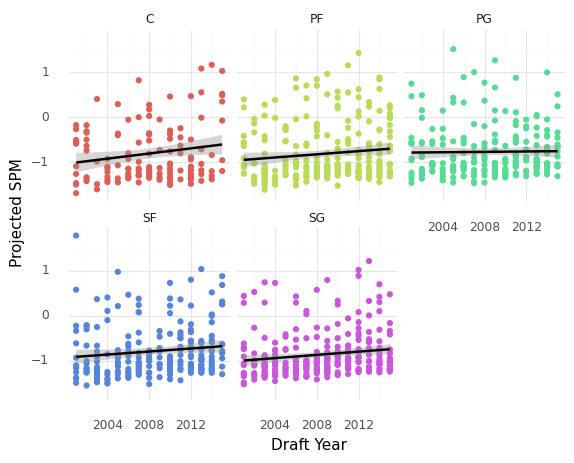

<ggplot: (-9223363279294941601)>

In [ ]:
# GGPlot

(ggplot(nba, aes(x = 'Draft Year', y = 'Projected SPM')) + geom_point(aes(color = 'Position')) + 
 facet_wrap('~Position') + theme_minimal() + stat_smooth(method = 'lm') + theme(legend_position = 'none'))

Looking at these plots, we have mapped out the "Projected SPM" over the "Draft Year" while separating each graph by "Position". This will tell us if over the years a certain "Position" has gotten better, worse, or stayed the same. At first glance, the red graph at the top left is showing the most growth, but there are fewer points than the rest. This means that the Center position has been collectively getting more talented and the trend is seeing a general increase. On the other hand, looking at the green graph at top right, the Point Guard postion seems to be relatively the same over the past 15 years. The line is not going up or down throughout, but there are definitely ouliers present during the 15 year period that point to that position being still extremely talented. For the most part, all of the positions are seeing a small increase over time in their "Projected SPM" and this goes along with the point of the league is getting better and better every year. More and more players are being able to do more things and are not 1 dimensional, especially the Center position. Before, that position used to only be the tallest players that would only stay close to the rim, but now that position has a lot more versatility. Almost every position can now do every part of the game, exceptionally well, and this is proof that the leaggue is getting more and more talented players. From a management perspective, when looking at prospective players we want them to meet the standards of the league, which is constantly improving year by year. 

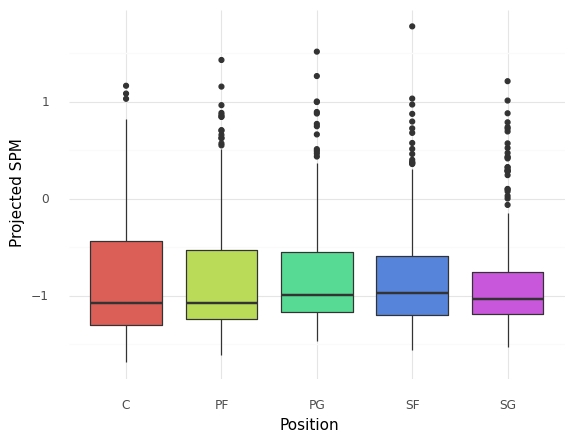

<ggplot: (8757550766449)>

In [ ]:
nba['Draft Year'] = str(nba['Draft Year'])

(ggplot(nba, aes('Position', 'Projected SPM', fill = 'Position')) + geom_boxplot() + theme_minimal() + theme(legend_position = 'none'))

This graph shows us the range of skill level of each position, and the most important takeaway from this is that the Center position has the biggest range of skill. They seem to have the highest "Projected SPM" but also players with the lowest "Projected SPM". This also helps teams know if a certain player in his position is performing within the average "Projected SPM" or below or even higher. Shooting guards seem to have the smallest variation in skill level. This helps management know if a player is meeting expectations or is not worth keeping on the team anymore due to his lack of performance and SPM. 

In [ ]:
feats = ['Draft Year','Superstar', 'Starter', 'Role Player', 'Bust']

zscore = StandardScaler()


In [ ]:
X = nba[feats]
y = nba['Projected SPM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train[feats] = zscore.fit_transform(X_train[feats])
X_test[feats] = zscore.fit_transform(X_test[feats])

X_train.head()

,Draft Year,Superstar,Starter,Role Player,Bust
974,-1.302731,-0.379381,-0.969942,-1.986634,2.423621
797,-0.824221,0.444325,0.953902,0.580673,-1.489255
658,-0.345712,-0.240533,0.424838,0.583160,-0.772698
815,-0.824221,-0.324763,-0.225238,0.882491,-0.272032
216,1.089816,-0.398428,-0.618542,0.329977,0.523360


In [ ]:
# Non Regularized
np.random.seed(10)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Training MAE: ' , mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE: ' , mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE:  0.03155839967992678
Testing MAE:  19463.52718956193


In [ ]:
# Ridge Regression

rr = Ridge()

rr.fit(X_train, y_train)

print('Training MAE: ' , mean_absolute_error(y_train, rr.predict(X_train)))
print('Testing MAE: ' , mean_absolute_error(y_test, rr.predict(X_test)))

Training MAE:  0.03155186892596066
Testing MAE:  0.03919011090556196


In [ ]:
# Lasso Regression

lsr = Lasso()

lsr.fit(X_train, y_train)

print('Training MAE: ' , mean_absolute_error(y_train, lsr.predict(X_train)))
print('Testing MAE: ' , mean_absolute_error(y_test, lsr.predict(X_test)))

Training MAE:  0.4434469104933402
Testing MAE:  0.4743702182657604


Our original question for this method was if there are fewer Busts than Superstars year after year. Now after looking at the data more and seeing the option of using Lasso and Ridge regression we thought a better question to ask would be to see if all of the variables are impactful in terms of predicting a players "Projected SPM". 
After running all of the regressions, we want to reemphasize the notion that the league is getting more skilled and that the positions are being expected to do more year after year. We decided to use all of the other continuous variables to predict the "Projected SPM" and use Linear Regression. Without regularization, the train MAE was extremely low, however the test MAE was abnormally high. This made us want to see how the errors would change if we were to penalize some of the less impactful variables by using Ridge and Lasso Regression. 
Running the Ridge regression, this will penalize the coefficients to as close as possible to 0 but never actually all the way, and this provided some great levels of error. The train MAE is about 0.03 and the test MAE is about 0.04. Then we ran a Lasso Regression to see if bringing the less impactful coefficients all the way to 0 would help the error or make it worse. This method showed a much higher error in both the train MAE and the test MAE. With both of the errors being above 0.44. This led us to conclude that all of the variables may not be extremely important to predicting a players "Projected SPM" but they are still valid and produce accurate results when used throughout the Linear Regression model. 
To conclude, when predicting "Projected SPM" the model needs to have all of the other continuous variables because without them the accuracy of the model falls tremendously, as seen by the Lasso method, and because the "Projected SPM" is built off of the other variables. Through these models we have found that the other variables are impactful and are necessary in order to accurately predict a players' "Projected SPM".